In [1]:
# mounting notebook with my google drive environment 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports, functions

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

dataset_path = '/content/drive/My Drive/NLP/dataset/'
print('Datasets:')
!dir "/content/drive/My Drive/NLP/dataset"

def evaluate_model(y_true, predictions):
  cm = confusion_matrix(y_true, predictions)
  print("\nConfusion matrix: \n", cm)
  print("")
  cr = classification_report(y_true, predictions)
  print("Classification report: \n", cr)
  print("")
  sns.heatmap(cm, annot=True)
  plt.show()

Datasets:
rt-polarity.neg  rt-polarity.pos


### Data

In [0]:
# reading files into dataframes
pos = pd.read_csv(dataset_path + 'rt-polarity.pos', sep='\t', header=None, names=['Sentiment'])
neg = pd.read_csv(dataset_path + 'rt-polarity.neg', sep='\t', header=None, names=['Sentiment'])
pos['Target'] = 1
neg['Target'] = 0

# creating one X dataframe
X_full = pd.concat((pos, neg), axis=0, ignore_index=True)
X_full = shuffle(X_full)

# splitting data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_full['Sentiment'],
                                                    X_full['Target'],
                                                    random_state=0,
                                                    test_size=0.2)

### Data vectorization

In [0]:
# tokenize examples, filter symbols
def tokenize(s): 
  re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
  return re_tok.sub(r' \1 ', s).split()

# vectorize tokenized examples
def vectorizer(X_train, X_test):
  vect = TfidfVectorizer(use_idf=True)
  X_train_tfidf = vect.fit_transform(X_train)
  X_test_tfidf = vect.transform(X_test)
  return X_train_tfidf, X_test_tfidf

# vectorized training and testing examples
X_train_vec, X_test_vec = vectorizer(X_train, X_test)

# Naive Bayes

## Functions

In [0]:
# grid search model to find optimal hyperparameters
def nb_model(alpha):
  grid={"alpha": alpha}
  nb_model = MultinomialNB()
  model = GridSearchCV(nb_model, grid,cv=5)
  return model

## Model

In [6]:
# creating and training a model
start_time = time.time()
model = nb_model(np.linspace(0.1,5, 10))
model.fit(X_train_vec, y_train)
pred_nb = model.predict(X_test_vec)
print('Execution time: {}'.format(time.time() - start_time))

Execution time: 0.33834195137023926


## Evaluation

In [0]:
# creating confusion matrix and classification report
cm_nb = confusion_matrix(y_test, pred_nb)
cr_nb = classification_report(y_test, pred_nb)

Best parameters are: {'alpha': 0.6444444444444445}
Accuracy: 76.91405792003752 %

Confusion matrix: 
 [[884 214]
 [243 792]]

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1098
           1       0.79      0.77      0.78      1035

    accuracy                           0.79      2133
   macro avg       0.79      0.79      0.79      2133
weighted avg       0.79      0.79      0.79      2133




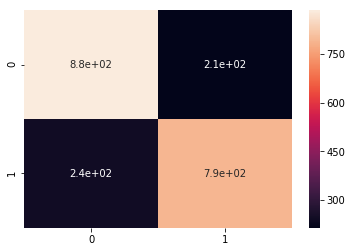

In [8]:
# best parameters
print('Best parameters are: {}'.format(model.best_params_))
# accuracy
print('Accuracy: {} %'.format(model.best_score_*100))
# confusion matrix, classification report
evaluate_model(y_test, pred_nb)

# Logistic regression

## Functions

In [0]:
# grid search model to find optimal hyperparameters
def loregr_model(C_range, penalties):
  grid={"C": C_range, "penalty": penalties}
  logreg = LogisticRegression()
  model = GridSearchCV(logreg, grid,cv=2)
  return model

## Model

In [10]:
# creating and training a model
start_time = time.time()
model = loregr_model(np.linspace(1,10,10), ["l1","l2"])
model.fit(X_train_vec, y_train)
pred_lg = model.predict(X_test_vec)
print('Execution time: {}'.format(time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Execution time: 2.754056215286255


## Evaluation

In [0]:
# creating confusion matrix and classification report
cm_lg = confusion_matrix(y_test, pred_lg)
cr_lg = classification_report(y_test, pred_lg)

Best parameters are: {'C': 4.0, 'penalty': 'l2'}
Accuracy: 74.89740884042678 %

Confusion matrix: 
 [[884 214]
 [243 792]]

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1098
           1       0.79      0.77      0.78      1035

    accuracy                           0.79      2133
   macro avg       0.79      0.79      0.79      2133
weighted avg       0.79      0.79      0.79      2133




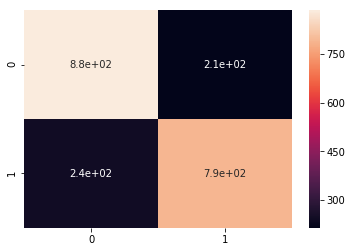

In [12]:
# best parameters
print('Best parameters are: {}'.format(model.best_params_))
# accuracy
print('Accuracy: {} %'.format(model.best_score_*100))
# confusion matrix, classification report
evaluate_model(y_test, pred_nb)